# 01) Laplace Transform


---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1.1 - Fourier Series

We begin by discussing the **Fourier series**, a powerful method for analyzing functions that are *periodic* in their input.

A **periodic function** $f(x)$ is one that repeats itself every time $x$ increases by a fixed amount $a$, called the **period**:

$$
f(x + a) = f(x), \quad \forall x \in \mathbb{R}.
$$

The constant $a$ is the **period** of the function.  
You can think of $x$ as representing a spatial coordinate, and $f(x)$ as a wave that repeats every distance $a$.

A periodic function can be visualized either as an infinite repeating wave, or equivalently, as a function defined on a single segment 
$-\frac{a}{2} \le x < \frac{a}{2}$ with **periodic boundary conditions**:

$$
f\left(-\frac{a}{2}\right) = f\left(\frac{a}{2}\right).
$$

This is like *wrapping the segment into a loop* — the endpoints connect seamlessly.

To completely specify $f(x)$, we could:

1. Write down an explicit formula for it, or  
2. Give its values within one period, $-\frac{a}{2} \le x < \frac{a}{2}$.

However, since there are infinitely many points in that interval, we usually only approximate $f(x)$ by sampling it at many discrete $x$-values.

There’s a more elegant approach: express $f(x)$ as a **linear combination** of simpler periodic functions — namely, sines and cosines.



$$
f(x) = \sum_{n=1}^{\infty} \alpha_n \sin\!\left(\frac{2\pi n x}{a}\right) + \sum_{m=0}^{\infty} \beta_m \cos\!\left(\frac{2\pi m x}{a}\right)
$$

Here:

- $\alpha_n$ and $\beta_m$ are the **Fourier coefficients**.  
- These coefficients determine how much of each sine and cosine contributes to the total function.
- The sine sum starts from $n = 1$ because the $n = 0$ term would vanish identically.
- If $f(x)$ is real-valued, all coefficients are real; if $f(x)$ is complex, so are the coefficients.

This decomposition means that any periodic function can be built up as a sum of harmonically related sine and cosine waves — each with its own amplitude given by $\alpha_n$ and $\beta_m$.

## 1.1.1 - Square-Integrable Function

Now, a natural question arises: can *every* periodic function be expressed as a Fourier series?

The short answer is — not always.  
The long answer is that it depends on how "well-behaved" the function is.  
Mathematicians spent a good part of the 19th century debating exactly what that means, but for our purposes, we can narrow it down quite neatly.

In most physical and engineering settings, the functions we deal with behave nicely enough to fit into a special category called **square-integrable functions**.  
These are the ones for which the following integral exists and is finite:

$$
\int_{-a/2}^{a/2} dx \, |f(x)|^2 < \infty
$$

What this means, intuitively, is that the total "energy" of the function — the area under its squared magnitude — is bounded.  
So long as that’s true, we’re safe: the Fourier series will converge, and we can represent the function faithfully with its harmonic components.

Even functions with jumps or sharp corners (like the square wave) are fine, because those discontinuities don’t make $|f(x)|^2$ blow up.  
But if the function grows without limit or oscillates too violently, that integral fails, and the Fourier series stops making sense.

From here on, we’ll simply assume that all the functions we work with are **square-integrable** — a reasonable assumption, since almost everything physical we care about is.and well-behaved.

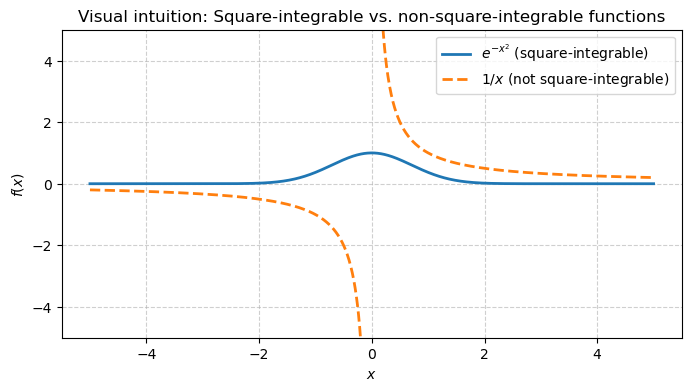

In [4]:
x = np.linspace(-5, 5, 1000)

# A square-integrable function: Gaussian
f1 = np.exp(-x**2)

# A non-square-integrable function: 1/x (diverges near 0)
f2 = 1 / (x + 1e-6)
f2[np.abs(x) < 0.1] = np.nan  # hide near singularity for cleaner plot

plt.figure(figsize=(8,4))
plt.plot(x, f1, label=r"$e^{-x^2}$ (square-integrable)", linewidth=2)
plt.plot(x, f2, label=r"$1/x$ (not square-integrable)", linestyle='--', linewidth=2)

plt.ylim(-5, 5)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Visual intuition: Square-integrable vs. non-square-integrable functions")
plt.legend()
plt.show()


## 1.1.2 - Complex Fourier series & Inverse Relations

So far, we’ve expressed the Fourier series in terms of sines and cosines. That’s fine, but it’s a little clunky — two separate sums, and two separate sets of coefficients. There’s a much cleaner way to write it, using Euler’s identity to combine the sines and cosines into exponentials.

Using $e^{ix} = \cos{x} + i\sin{x}$, the Fourier series can be rewritten as:

$$
f(x) = \sum_{n=-\infty}^{\infty} e^{\,2\pi i n x / a} \, f_n
$$

Here, the $\{f_n\}$ are the **complex Fourier coefficients**. This version is far more elegant — it’s a single sum that automatically captures both the sine and cosine contributions. Notice that $n$ now runs over all integers, positive and negative, which accounts for both "directions" of oscillation.

If we know the coefficients $\{f_n\}$, we can reconstruct $f(x)$ using this sum.  
But the reverse is also true: given $f(x)$, we can determine the coefficients.

To see why, let’s use the orthogonality of complex exponentials.  
Consider the integral:

$$
\int_{-a/2}^{a/2} e^{-2\pi i m x / a} e^{\,2\pi i n x / a} \, dx = a \, \delta_{mn}
$$

where $\delta_{mn}$ is the **Kronecker delta**, defined as:

$$
\delta_{mn} =
\begin{cases}
1, & \text{if } m = n \\
0, & \text{if } m \ne n
\end{cases}
$$

This orthogonality condition means that each exponential term is "independent" of the others — like perpendicular vectors in ordinary space. In fact, you can think of the functions $e^{\,2\pi i n x / a}$ as forming an orthogonal basis, much like $\hat{i}$, $\hat{j}$, and $\hat{k}$ in 3D geometry.

Now, multiply both sides of the Fourier series by $e^{-2\pi i m x / a}$ and integrate over one period:

$$
\int_{-a/2}^{a/2} e^{-2\pi i m x / a} f(x) \, dx
= \int_{-a/2}^{a/2} e^{-2\pi i m x / a}
  \left[ \sum_{n=-\infty}^{\infty} e^{\,2\pi i n x / a} f_n \right] dx
$$

The orthogonality kicks in, filtering out all terms except the one where $n = m$:

$$
\int_{-a/2}^{a/2} e^{-2\pi i m x / a} f(x) \, dx
= a f_m
$$

and therefore,

$$
f_m = \frac{1}{a} \int_{-a/2}^{a/2} e^{-2\pi i m x / a} f(x) \, dx
$$

This gives us the **pair of relations** connecting the function and its coefficients:

$$
f(x) = \sum_{n=-\infty}^{\infty} e^{\,i k_n x} f_n, \quad
f_n = \frac{1}{a} \int_{-a/2}^{a/2} e^{-i k_n x} f(x) \, dx
$$

where

$$
k_n = \frac{2\pi n}{a}
$$

The quantities $k_n$ are called the **wave numbers**.They represent the spatial frequencies of the harmonics in $f(x)$ — one for each integer $n$. In physics terms, the wave numbers are said to be *quantized* in multiples of $\Delta k = 2\pi / a$.

So, in summary:  
- The Fourier coefficients $f_n$ tell us *how much* of each frequency component exists in $f(x)$.  
- The function itself can be reconstructed as a sum of those components.  
- The entire process is symmetric and beautifully self-contained.

n   alpha_true     alpha_n (num)     beta_true      beta_n (num)
 1   1.27324       1.27324         0.00000       0.00200
 2   0.00000       0.00000         0.00000      -0.00000
 3   0.42441       0.42441         0.00000       0.00200
 4   0.00000      -0.00000         0.00000       0.00000
 5   0.25465       0.25464         0.00000       0.00200
 6   0.00000      -0.00000         0.00000       0.00000


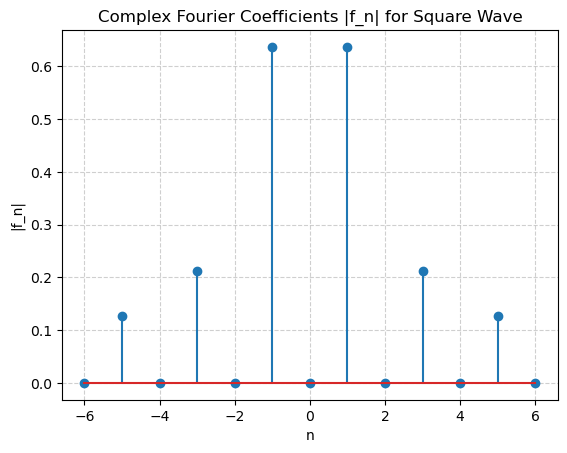

In [18]:
"""
This code demonstrates the ideas in Section 10.1.2: Complex Fourier Series and Inverse Relations.

Goal:
1. Define a periodic function f(x) on one period. Here we use a square wave on [-a/2, a/2].
2. Compute the complex Fourier coefficients f_n numerically using
       f_n = (1/a) * integral( f(x) * exp(-i * k_n * x) dx )
   where k_n = 2 * pi * n / a.
3. Use the inverse relations to recover the real sine and cosine coefficients:
       beta_n  = f_n + f_-n
       alpha_n = i * (f_n - f_-n)
4. Compare the recovered alpha_n, beta_n against the known analytic Fourier series
   of the square wave:
       alpha_n = 4 / (n * pi) for odd n, 0 for even n
       beta_n  = 0 for all n
5. Plot the magnitude |f_n| to visualize how the complex coefficients decay with n.
"""

# --------------------------------------------------
# Basic parameters
# --------------------------------------------------
a          = 2.0 * np.pi      # period of f(x)
num_points = 2000             # number of samples in one period
max_n      = 6                # compute harmonics n = -max_n,...,+max_n

# Sample grid over one period: x in [-a/2, a/2)
x = np.linspace(-a/2.0, a/2.0, num_points, endpoint=False)
dx = x[1] - x[0]

# --------------------------------------------------
# 1. Define f(x): a square wave centered at x = 0
#    f(x) = -1 for x < 0, +1 for x >= 0
# --------------------------------------------------
f_x = np.where(x < 0.0, -1.0, 1.0)

# --------------------------------------------------
# 2. Compute complex Fourier coefficients f_n
#    f_n = (1/a) * integral f(x) * exp(-i * k_n * x) dx
#    We approximate the integral with a Riemann sum.
# --------------------------------------------------
n_values = np.arange(-max_n, max_n + 1)     # n = -max_n,...,+max_n
f_n = np.zeros(len(n_values), dtype=complex)

for index, n in enumerate(n_values):
    k_n = 2.0 * np.pi * n / a
    integrand = f_x * np.exp(-1j * k_n * x)
    f_n[index] = (1.0 / a) * np.sum(integrand) * dx

# --------------------------------------------------
# 3. Use inverse relations to recover alpha_n and beta_n
#    For n >= 1:
#       beta_n  = f_n + f_-n
#       alpha_n = i * (f_n - f_-n)
# --------------------------------------------------
alpha_n = np.zeros(max_n)   # alpha_1,...,alpha_max_n
beta_n  = np.zeros(max_n)   # beta_1,...,beta_max_n

for n in range(1, max_n + 1):
    # find indices for +n and -n in n_values
    idx_pos = np.where(n_values == n)[0][0]
    idx_neg = np.where(n_values == -n)[0][0]

    f_pos = f_n[idx_pos]
    f_neg = f_n[idx_neg]

    beta_n[n - 1]  = (f_pos + f_neg).real
    alpha_n[n - 1] = (1j * (f_pos - f_neg)).real

# --------------------------------------------------
# 4. Analytic Fourier coefficients for this square wave
#    On [-a/2, a/2] with period 2*pi:
#       alpha_n = 4 / (n * pi) for odd n, 0 for even n
#       beta_n  = 0 for all n
# --------------------------------------------------
alpha_true = np.array([
    4.0 / (n * np.pi) if n % 2 == 1 else 0.0
    for n in range(1, max_n + 1)
])
beta_true = np.zeros_like(alpha_true)

# --------------------------------------------------
# 5. Print comparison between analytic and numeric coefficients
# --------------------------------------------------
print("n   alpha_true     alpha_n (num)     beta_true      beta_n (num)")
for n in range(1, max_n + 1):
    print(
        f"{n:2d}  "
        f"{alpha_true[n-1]: .5f}      "
        f"{alpha_n[n-1]: .5f}        "
        f"{beta_true[n-1]: .5f}      "
        f"{beta_n[n-1]: .5f}"
    )

# --------------------------------------------------
# 6. Plot magnitude of complex coefficients |f_n|
# --------------------------------------------------
plt.stem(n_values, np.abs(f_n))
plt.title("Complex Fourier Coefficients |f_n| for Square Wave")
plt.xlabel("n")
plt.ylabel("|f_n|")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# 1.1.3 - Example: Fourier Series of a Square  Wave


To get a sense of how the Fourier series actually behaves, let’s look at a simple and
visually striking example — the **square wave**.

This is not because Fourier series are only useful for square waves, but because the square
wave captures the essence of what Fourier series do: take a function with sharp edges and
represent it using smooth sine and cosine components.

In fact, the same method applies to *any* periodic function — sawtooth waves, triangle
waves, periodic pulses, or even highly irregular signals — the math remains identical.  
We just use the square wave here because it’s easy to visualize and has clean symmetry.

Within one period, define $f(x)$ as

$$
f(x) =
\begin{cases}
-1, & -a/2 \le x < 0 \\
+1, & 0 \le x < a/2
\end{cases}
$$

This function alternates between $+1$ and $-1$ every half-period, jumping between the two
values at $x = 0$ and $x = \pm a/2$.

Plugging this $f(x)$ into the complex Fourier relation,

$$
f_n = \frac{1}{a} \int_{-a/2}^{a/2} f(x)\, e^{-i k_n x}\, dx,
\quad \text{where } k_n = \frac{2\pi n}{a},
$$

and carrying out the integration, gives the coefficients

$$
f_n = -i\,\frac{[\sin(n\pi/2)]^2}{n\pi/2}
     = 
\begin{cases}
-\dfrac{2i}{n\pi}, & n \text{ odd}, \\[6pt]
0, & n \text{ even}.
\end{cases}
$$

Notice that only **odd harmonics** contribute — the even terms vanish because of the
function’s symmetry.

Also, as $n$ increases, $|f_n|$ decreases roughly as $1/n$, which means that higher-frequency
components carry less weight in the overall reconstruction.

Substituting the coefficients back into the complex expansion and collecting sine terms
gives the **real Fourier series** form:

$$
f(x) = \sum_{n=1,3,5,\dots}^{\infty} \frac{4}{n\pi}
\sin\!\left( \frac{2\pi n x}{a} \right).
$$

This is the infinite series representation of the square wave.  
Truncating it after a finite number of terms gives an approximation to $f(x)$ that becomes
better as more terms are included.

In [23]:
%%manim -qm -v WARNING FourierSquareWave

from manim import *
import numpy as np

class FourierSquareWave(Scene):
    """
    Animate the Fourier series of a square wave, without using Tex
    (so no external LaTeX is needed).
    """

    def construct(self):
        # Axes
        axes = Axes(
            x_range=(-np.pi, np.pi, np.pi / 2),
            y_range=(-1.5, 1.5, 0.5),
            x_length=8,
            y_length=3,
            tips=False,
        )

        # Simple text labels instead of Tex / MathTex
        x_label = Text("x", font_size=28).next_to(axes.x_axis.get_end(), DOWN)
        y_label = Text("f(x)", font_size=28).next_to(axes.y_axis.get_end(), LEFT)
        axes_labels = VGroup(x_label, y_label)

        self.play(Create(axes), FadeIn(axes_labels))

        # Target square wave
        def square_wave(x):
            return -1.0 if x < 0.0 else 1.0

        square_graph = axes.plot(
            square_wave,
            x_range=[-np.pi, np.pi],
            discontinuities=[0.0, -np.pi, np.pi],
            use_smoothing=False,
            color=YELLOW,
        )
        self.play(Create(square_graph))

        # Fourier partial sum
        def fourier_square_partial(x, n_terms):
            # f_N(x) = 4/pi * sum_{k=0}^{n_terms-1} sin((2k+1)*x)/(2k+1)
            result = 0.0
            for k in range(n_terms):
                n = 2 * k + 1
                result += np.sin(n * x) / n
            return (4.0 / np.pi) * result

        N_tracker = ValueTracker(1)

        def get_partial_graph():
            # Round N to nearest odd int >= 1
            N_raw = int(np.round(N_tracker.get_value()))
            if N_raw < 1:
                N_raw = 1
            if N_raw % 2 == 0:
                N_raw += 1
            n_terms = (N_raw + 1) // 2

            return axes.plot(
                lambda x: fourier_square_partial(x, n_terms),
                x_range=[-np.pi, np.pi],
                color=RED,
            )

        partial_graph = always_redraw(get_partial_graph)

        # Plain text label for N
        def get_N_label():
            N_raw = int(np.round(N_tracker.get_value()))
            return Text(
                f"N = {N_raw}", font_size=28
            ).to_corner(UR).shift(LEFT * 0.5 + DOWN * 0.3)

        N_label = always_redraw(get_N_label)

        self.play(Create(partial_graph), FadeIn(N_label))

        # Animate N: 1 -> 5 -> 15 -> 29
        for target_N in [1, 5, 15, 29]:
            self.play(N_tracker.animate.set_value(target_N), run_time=2)
            self.wait(0.5)

        self.wait(2)



Manim Community v0.19.0

# 1.2 - Fourier transform

# 1.3 - The Laplace Transform